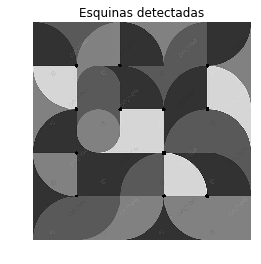

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('geometrico.jpg', cv2.IMREAD_GRAYSCALE)

# Calcular el gradiente de la imagen
dx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=5)
dy = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=5)

# Calcular el producto de las derivadas
Ix2 = dx**2
Iy2 = dy**2
Ixy = dx * dy

# Aplicar la ventana de Gauss a los productos de derivadas
ksize = 5
sigma = 1.0
Ix2_blur = cv2.GaussianBlur(Ix2, (ksize, ksize), sigma)
Iy2_blur = cv2.GaussianBlur(Iy2, (ksize, ksize), sigma)
Ixy_blur = cv2.GaussianBlur(Ixy, (ksize, ksize), sigma)

# Calcular la respuesta de Harris
k = 0.04
det_M = Ix2_blur * Iy2_blur - Ixy_blur**2
trace_M = Ix2_blur + Iy2_blur
harris_response = det_M - k * trace_M**2

# Umbralizar la respuesta de Harris
umbral = 0.01 * harris_response.max()
esquinas = np.argwhere(harris_response > umbral)

# Dibujar las esquinas en la imagen original
for y, x in esquinas:
    cv2.circle(imagen, (x, y), 3, (0, 255, 0), -1)

# Mostrar la imagen con las esquinas
plt.imshow(imagen, cmap='gray')
plt.title('Esquinas detectadas')
plt.axis('off')
plt.show()